### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 3

Magnetfelt er generelt vanskelig å studere analytisk, hvor analytiske resultater er kjent kun for noen få systemer. Denne øvingen handler om å studere to av disse systemene ved å se på magnetfeltet rundt strømførende ledninger i to forskjellige orienteringer. Den første oppgaven innebærer å diskretisere og utføre et numerisk integral av en endelig ledning parallelt med planet. Den andre oppgaven er valgfri, og omhandler en ledning som står vinkelrett på planet, siden $\nabla \times \vec{B} \neq 0$ vil dette føre til noen numeriske utfordringer mht. retningen på feltlinjene. Det forventes kjennskap til plotting av funksjoner i to dimensjoner, samt bruk av to-dimensjonale arrays i form av meshgrids.

### Oppgave 1: Numerisk Integrasjon

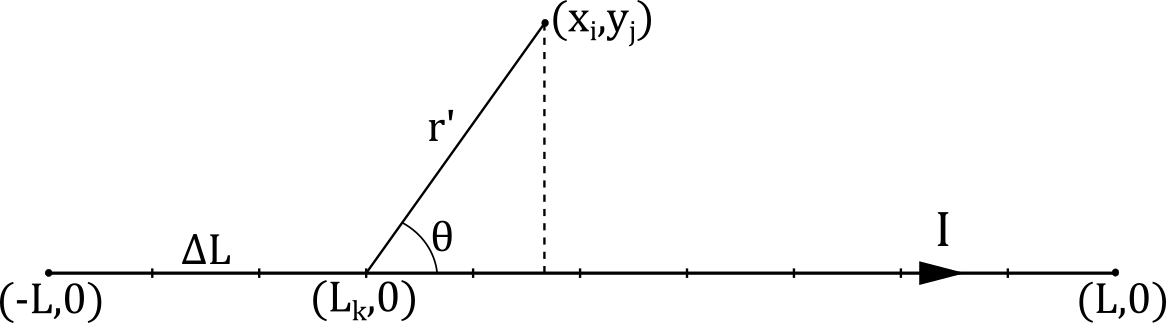

Systemet vi skal se på består av en endelig ledning som går fra $(-L,0)$ til $(L,0)$ der strømmen $I$ har retning mot høyre som vist på figuren. Fra Biot-Savarts lov har vi at magnetfeltet fra en slik ledning er gitt ved
\begin{equation}
\vec{B}(\vec{r}) = \frac{\mu_0I}{4 \pi} \int_{\textit{C}}\frac{\text{d}\vec{l} \times \vec{r}'}{r'^3} \text{,}
\end{equation}
der $\vec{r}':=\vec{r}-\vec{l}$ er en vektor fra et punkt $\vec{l}$ på ledningen til $\vec{r} = (x,y)$. Integralet går over hele ledningen. 

Vi kan skrive ut kryssproduktet som $\text{d}\vec{l}\times\vec{r}' = |\text{d}\vec{l}||\vec{r}'|\sin\theta$, og vi ser fra figuren at $\sin\theta = \frac{y}{|\vec{r}'|}$. I tillegg ligger både $\vec{r'}$ og $\text{d}\vec{l}$ i xy-planet, så magnetfeltet er rettet langs z-aksen. Ved å sette inn alt dette i Biot-Savarts lov, finner vi at styrken på magnetfeltet er gitt ved
\begin{equation}
    B(x,y) = \frac{\mu_0I}{4 \pi} \int_{-L}^{L}\frac{\text{d}x\, y}{|r'|^3}.
\end{equation}

Vi skal nå utføre dette integralet numerisk, ved å skrive det om til en diskret sum over punkter på ledningen. Generellt kan vi dele inn ledningen i $N$ punkter (10 på figuren i og med at vi ikke teller høyre endepunkt) med innbyrdes avstand $\Delta L$. Et punkt på ledningen har da koordinat $(L_k, 0)$, der $L_k \in \{-L, -L+\Delta L, -L+2\Delta L, ... ,L-\Delta L\}$. Videre ser vi fra figuren at $|r'| = \sqrt{(L_k - x_i)^2 + y_j^2}$. Dermed kan integralet vårt skrives som
\begin{equation}
    B(x_i, y_j) = \frac{\mu_0I}{4 \pi} \sum_{k=1}^{N}\frac{\Delta L y_j}{((L_k-x_i)^2 +y_j^2))^{3/2}}
\end{equation}


## a)
Lag en funksjon create_wire som returnerer en array med $N$ punkter fra $-L$ til $L-\Delta L$.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0
L = 1
N = 100
def create_wire(start,end,N):
    dL = (start - end)/N
    return np.array([-start + n*dL for n in range(N)])#Here the end pint is not in the aray as wanted

## b)
Lag en funksjon calc_magneticfield som regner ut det magnetiske feltet for et meshgrid (xi, yj). Denne burde også ha ledningen du laget i a) som input. Magnetfeltet regnes ut ved å utføre den diskrete summen som ble utledet i introduksjonen. 

Tips: Ettersom vi deler på null når $x_i = L_k$ og $y_j = 0$, vil det oppstå numeriske singulariteter langs ledningen. Dette må løses på et fornuftig vis. 

In [1]:
def calc_magneticfield(xv,yv,wire):
    dL = wire[1] - wire[0]
    for count, value in enumerate(wire):
        if value == 0: 
            value = wire[count+1]/2
        if count == 0:
            B = yv*dL/np.sqrt(((value-xv)**2 + yv**2)**(3/2)) #Her tas ikke mu_0*I/4pi med, slik at plottet er normaliser med det
        else:                                           #som enhet
            B += yv*dL/np.sqrt(((value-xv)**2 + yv**2)**(3/2))
    return B

## c) 
Fremstill resultatene i et heatplot. Dere kan f.eks velge $L=1$ og plotte for et område $x,y \in (-2,2)$. Magnetfeltet burde normaliseres (plottes i enhet $\mu_0I/4\pi$).

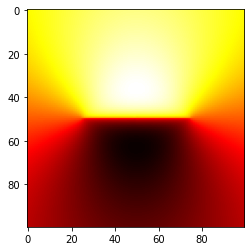

In [5]:
xs = np.linspace(-2*L,2*L,N)
ys = np.linspace(-2*L,2*L,N)
xv,yv = np.meshgrid (xs,ys)
B = calc_magneticfield(xv,yv,create_wire(-L,L,N))
plt.imshow(B,"hot") #Log makes the plot more interesting than having all the light at the wire

### Ekstraoppgave: Ledning vinkelrett på planet

En annen kjent konfigurasjon er en uendelig lang og uendelig tynn ledning orientert vinkelrett på planet med konstant strøm, $I$. Styrken på magnetfeltet vil da være trivielt være $|\vec{B}(\vec{r})| = \frac{\mu_0I}{4 \pi r^2}$, utfordringen med en numerisk formulering av denne situasjonen ligger i å beregne *retningen* magnetfeltet går i. 

**Om ledningen er uendelig lang så vil vel r avhegigheten være $\frac{\mu_0I}{2 \pi r}$?**

$\frac{\mu_0I}{4 \pi r^2}$ har til og med enheten [Tesla]/[meter], så dette virker feil.


$\textbf{a)}$ Plot magnetfeltet rundt en uendelig lang og uendelig tynn strømførende leder som står vinkelrett på planet i origo med konstant strøm, $I$, retning ut av planet.

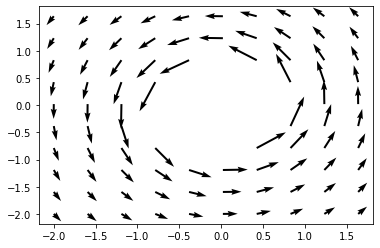

In [96]:
def calc_magneticfield2(xv,yv,wire):
    for count, value in enumerate(wire):
        if value == 0: 
            value = wire[count+1]/2
        theta = (np.arctan(yv/xv)) # np.arctan returns a value between [-pi/2,+pi/2], and it does not distinguish
        if count == 0: #between the 1st and 3rd, and 2nd and 4th quadrant. 
            Bx = -np.sin(theta)/np.sqrt((xv**2 + yv**2)) * xv/abs(xv)# This terms corrects for this flipping the
            By = np.cos(theta)/np.sqrt((xv**2 + yv**2)) * xv/abs(xv)#directions of the arrows in 2nd and 3rd quadrant.
        
        else:                                           
            break #med riktig avhengighet trenger vi ikke iterere over ledningen. Dette ødelegger litt vitsen med å
            # løse numerisk da. Må ses mer på!
            Bx += -np.sin(theta)/np.sqrt((xv**2 + yv**2)) * xv/abs(xv)
            By += np.cos(theta)/np.sqrt((xv**2 + yv**2)) * xv/abs(xv)
    Bx[np.abs(Bx) > 1] = np.nan
    By[np.abs(By) > 1] = np.nan
    return Bx,By

Bx,By = calc_magneticfield2(xv,yv,create_wire(-L,L,N))
plt.quiver(xs[0:N:N//10], ys[0:N:N//10],Bx[::N//10,::N//10], By[::N//10,::N//10])

$\textbf{b)}$ Innfør flere ledninger i systemet, og se på hvordan magnetfeltet varier mht. posisjon og strømretning.

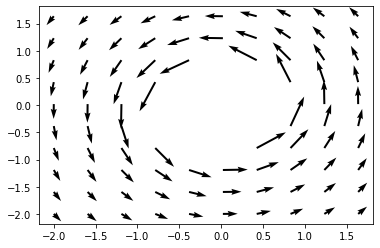

In [97]:
def calc_magneticfield_multiple(xv,yv,wires):
    for count, wire in enumerate(wires):
        for value in wire:
            if value == 0: 
                value = wire[count+1]/2
            theta = (np.arctan(yv/xv)) # np.arctan returns a value between [-pi/2,+pi/2], and it does not distinguish
            if count == 0: #between the 1st and 3rd, and 2nd and 4th quadrant. 
                Bx = -np.sin(theta)/np.sqrt((xv**2 + yv**2)) * xv/abs(xv)# This terms corrects for this flipping the
                By = np.cos(theta)/np.sqrt((xv**2 + yv**2)) * xv/abs(xv)#directions of the arrows in 2nd and 3rd quadrant.

            else:                                           
                Bx += -np.sin(theta)/np.sqrt((xv**2 + yv**2)) * xv/abs(xv)
                By += np.cos(theta)/np.sqrt((xv**2 + yv**2)) * xv/abs(xv)
    Bx[np.abs(Bx) > 100] = np.nan
    By[np.abs(By) > 100] = np.nan
    return Bx,By

Bx,By = calc_magneticfield2(xv,yv,create_wire(-L,L,N))
plt.quiver(xs[0:N:N//10], ys[0:N:N//10],Bx[::N//10,::N//10], By[::N//10,::N//10])